# ETL: Transformation and Load

## Extract the dataset


In [2]:
# Import libraries
import pandas as pd
import numpy as np

# Adjust the maximum number of rows to display.
pd.set_option('display.max_rows', 100)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
# Extract dataset

# sep specifies the separator between values in the dataset (which is a regular 
# expression for comma followed by any amount of whitespace). 
adult_data = pd.read_csv(url, names=column_names, sep="\s*,\s*", engine='python')
adult_data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data cleaning: Deletion

In [18]:
# Check missing values (in this dataset, missing values are marked with '?').
missing_values = (adult_data == '?') # Returns a DF with T/F on every cell that has '?'

# We add horizontally 
num_missing_per_row = missing_values.sum(axis=1) 

# Set a limit for the maximum number of missing values per row.
threshold = 2

# Filter the DataFrame to keep only those rows that have 'threshold' or fewer missing values.
df_cleaned = adult_data[num_missing_per_row <= threshold]

print(f"Before cleaning: {adult_data.shape[0]} filas")
print(f"After cleaning: {df_cleaned.shape[0]} filas")



Before cleaning: 32561 filas
After cleaning: 32534 filas


In [ ]:
df_final = df_cleaned.reset_index(drop=True)
df_final.tail(5)

# Data cleaning: Imputation


In [21]:
# Using the scikit-learn library to perform data imputation. Imputation is a process 
# of filling in missing values in a dataset with estimated or predicted values.

from sklearn.impute import SimpleImputer

# Replace ? values for NaN
df_final.replace("?", np.nan, inplace=True)
df_final.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
df_final.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [23]:
# In this part of the code, categorical variables (those with discrete values like 
# labels or categories) are being imputed.

# Impute missing values for categorical variables.
imputer_categorical = SimpleImputer(strategy='most_frequent')
for col in ['workclass', 'occupation', 'native-country']:
    df_final[col] = imputer_categorical.fit_transform(df_final[col].values.reshape(-1, 1))

# Impute missing values for numerical variables (if any)
imputer_numerical = SimpleImputer(strategy='mean')
for col in ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']:
    df_final[col] = imputer_numerical.fit_transform(df_final[col].values.reshape(-1, 1))


# df_final[col]: This extracts a specific column named 'col' from the DataFrame df_final.
#     -> .values: This converts the selected column into a NumPy array. 
#         The .values attribute returns the underlying data as a NumPy array.

#     -> .reshape(-1, 1): This reshapes the NumPy array. The -1 as the first dimension
#         indicates that Pandas/NumPy should automatically determine the size 
#         based on the other specified dimension, which is 1 in this case. 
#         The purpose of this reshaping is to create a 2-dimensional array with a single column.
#         This is required because scikit-learn's SimpleImputer expects a 2D array as
#         input.

#     -> fit_transform(...): The fit_transform() method is a common method in scikit-learn
#         transformers, like SimpleImputer. It performs two steps:

#         1. Fit: The imputer learns some information from the data (e.g., mean, most 
#                 frequent value) that it will later use to fill in missing values.
#         2. Transform: The imputer applies the learned information to the data, 
#                 replacing missing values with the imputed values. So, 
#                 fit_transform(df_final[col].values.reshape(-1, 1)) 
#                 does the following:

#             - Extracts the specific column col from the DataFrame.
#             - Converts the column into a NumPy array.
#             - Reshapes the array to have a single column.
#             - Uses the SimpleImputer to both fit the imputer's strategy 
#                 (learn from the data) and transform the data 
#                 (replace missing values with imputed values).

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [25]:
df_final.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply the encoding to the column 'income'
df_final['income_encoded'] = le.fit_transform(df_final['income'])

# To verify the changes.
print(df_final[['income', 'income_encoded']].head(100))

   income  income_encoded
0   <=50K               0
1   <=50K               0
2   <=50K               0
3   <=50K               0
4   <=50K               0
5   <=50K               0
6   <=50K               0
7    >50K               1
8    >50K               1
9    >50K               1
10   >50K               1
11   >50K               1
12  <=50K               0
13  <=50K               0
14   >50K               1
15  <=50K               0
16  <=50K               0
17  <=50K               0
18  <=50K               0
19   >50K               1
20   >50K               1
21  <=50K               0
22  <=50K               0
23  <=50K               0
24  <=50K               0
25   >50K               1
26  <=50K               0
27   >50K               1
28  <=50K               0
29  <=50K               0
30  <=50K               0
31  <=50K               0
32  <=50K               0
33  <=50K               0
34  <=50K               0
35  <=50K               0
36  <=50K               0
37  <=50K   

In [27]:
# Rename the column
df_income = df_final.drop(columns=['income'])
df_encoding = df_income.rename(columns={'income_encoded': 'income'})
df_encoding.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


# Data normalization

In [36]:
# Importing the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# The StandardScaler is a widely used preprocessing technique in machine learning
# that aims to standardize the features of a dataset.

# Standardization, also known as z-score normalization, transforms the features of 
# the dataset so that they have zero mean and a standard deviation of 1. This process
# is particularly useful when working with algorithms that assume the features 
# are normally distributed or when features have different scales.

# When you standardize your data, it ensures that each feature contributes to the
# learning process on a similar scale, which can improve the performance and 
# convergence of many machine learning algorithms.
from sklearn.preprocessing import StandardScaler

# Loading the wine dataset
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [38]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [39]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Showing dataset first columns.
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


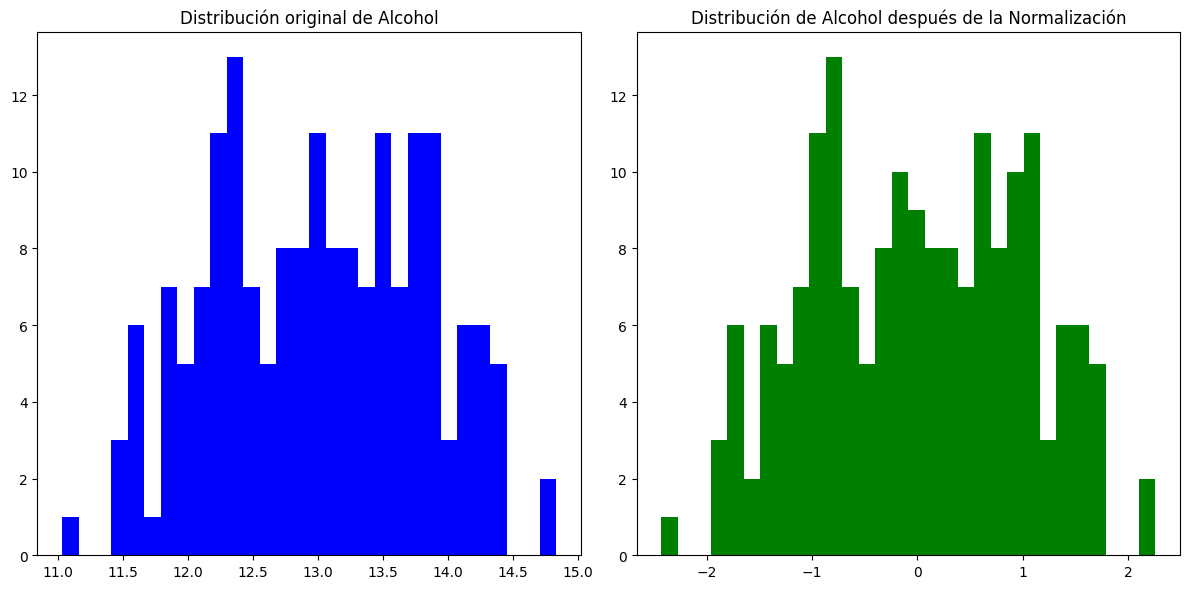

In [40]:
# Histogram of a feature to visualize the original distribution.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['alcohol'], color='blue', bins=30)
plt.title('Distribución original de Alcohol')

# Normalizing the features.
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Histogram of the same feature after normalization.
plt.subplot(1, 2, 2)
plt.hist(df_normalized['alcohol'], color='green', bins=30)
plt.title('Distribución de Alcohol después de la Normalización')
plt.tight_layout()
plt.show()

In [ ]:
# Displaying the first rows of the normalized dataset
df_normalized.head()

# Data discretization

In [41]:
# Loading the wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash",
                "Magnesium", "Total phenols", "Flavanoids",
                "Nonflavanoid phenols", "Proanthocyanins", "Color intensity",
                "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine_data = pd.read_csv(url, header=None, names=column_names)

# Defining the boundaries for the categories.
bins = [wine_data['Alcohol'].min(), 12, 13, wine_data['Alcohol'].max()]

# Here, you are defining the boundaries for creating categories based on the 'Alcohol' column. 
# This code section defines three bins: 
#    1. one for alcohol content lower than the minimum, 
#    2. one for alcohol content between 12 and 13, 
#    3. and another for alcohol content greater than the maximum.

# Labels for the categories.
labels = ["bajo", "medio", "alto"]

# Creating the new column with the discretized categories.
wine_data['Alcohol_category'] = pd.cut(wine_data['Alcohol'], bins=bins, labels=labels, include_lowest=True)

# This line of code is using the pd.cut() function from the Pandas library to create a new column 
# in the wine_data DataFrame with discretized categories based on the 'Alcohol' column. 
# Here's what each parameter does:

#    - wine_data['Alcohol']: This is the column from which you want to create categories.
#                   In this case, it's the 'Alcohol' column from the wine_data DataFrame.

#    - bins=bins: This parameter specifies the boundaries for the categories. 
#                   It's a list of values that define the edges of the bins. 
#                   Values that fall within a specific range defined by these bin edges 
#                   will be placed in the corresponding category.

#    - labels=labels: This parameter assigns labels to the categories. 
#                        These labels will be assigned to the data points that fall into the 
#                        respective bins. The labels correspond to the categories you've 
#                        defined earlier.

#    - include_lowest=True: This parameter includes the lowest bin edge in the first category. 
#                             In other words, it includes the minimum value of the 'Alcohol' column 
#                             in the first category. If a data point's value is equal to the lowest 
#                             bin edge, it will be included in the first category.

#  So, in simpler terms, this line of code takes the 'Alcohol' values from the wine_data DataFrame, 
#   divides them into categories based on the specified bins and labels, and assigns these categories 
#   to the new column 'Alcohol_category' in the same DataFrame. The include_lowest=True ensures that 
#   the lowest value is included in the first category. The result is a discretized representation 
#   of the 'Alcohol' values in categories like "bajo," "medio," and "alto," as specified by the labels
#   list.|

In [42]:
wine_data.head(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Alcohol_category
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,alto
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,alto
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,alto
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,alto
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,alto


# Feature engineering

In [44]:
# Color intensity-alcohol ratio
# This new column is calculated by dividing the values in the 'Color intensity' column by the 
# corresponding values in the 'Alcohol' column.

wine_data['Color_to_alcohol_ratio'] = wine_data['Color intensity'] / wine_data['Alcohol']
wine_data.head(5)

# So, for each row in the DataFrame, the 'Color intensity' value is divided by the corresponding 
# 'Alcohol' value, resulting in the 'Color_to_alcohol_ratio' for that row. 
# This ratio essentially measures how color intensity relates to alcohol content in each wine entry.

# This type of operation is often used in data analysis to create new features that capture the
# relationship or ratio between two existing variables, providing additional insights or perspectives
# on the data.

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Alcohol_category,Color_to_alcohol_ratio
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,alto,0.396346
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,alto,0.331818
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,alto,0.431611
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,alto,0.542797
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,alto,0.326284


In [45]:
# Magnesio-alcohol ratio
wine_data['Mg_to_Alcohol_ratio'] = wine_data['Magnesium'] / wine_data['Alcohol']
wine_data.head(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Alcohol_category,Color_to_alcohol_ratio,Mg_to_Alcohol_ratio
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,alto,0.396346,8.924807
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,alto,0.331818,7.575758
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,alto,0.431611,7.674772
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,alto,0.542797,7.863605
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,alto,0.326284,8.912387


# Load


In [ ]:
# Installation and importation of necessary libraries
import sqlite3

# Creating a connection to an SQLite database and loading data
conn = sqlite3.connect('demo_etl.db')

# Load the dataframe into a new table called 'Personas'.
wine_data.to_sql('Wines', conn, if_exists='replace', index=False)

# Query the database to verify that the data has been loaded correctly.
consulta = pd.read_sql('SELECT * FROM Wines', conn)
consulta